# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [14]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
# Inspect the shapes of the datasets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 1. Inspect the shapes of the datasets
print("DATASET SHAPES:")
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

print(f"\ny_train_onehot shape: {y_train_onehot.shape}")
print(f"First label after onehot: {y_train_onehot[0]}")

DATASET SHAPES:
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

y_train_onehot shape: (60000, 10)
First label after onehot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


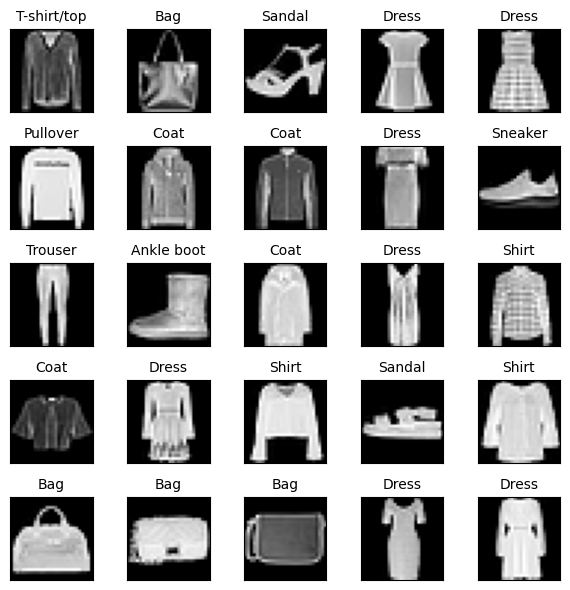

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected
plt.figure(figsize=(6, 6))

for i in range(25):
    plt.subplot(5, 5, i + 1)

    index = np.random.randint(0, len(X_train))
    plt.imshow(X_train[index], cmap='gray')
    plt.title(f'{class_names[y_train[index]]}', fontsize=10)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

The data appears as expected but the image quality is okay not so good. The images are good enough to differentiate with other images. The image data is little blurry especially from the edges.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10))

# Compile the model
model.compile(
    optimizer='adam',                           # Adam optimizer
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,                  # Train for 10 epochs
    validation_split=0.2,       # Use 20% of training data for validation
    verbose=1
)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1454 - loss: 8.7889 - val_accuracy: 0.1445 - val_loss: 2.2427
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1462 - loss: 2.2482 - val_accuracy: 0.1445 - val_loss: 2.2427
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1504 - loss: 2.2456 - val_accuracy: 0.1445 - val_loss: 2.2423
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1245 - loss: 2.2706 - val_accuracy: 0.0678 - val_loss: 2.3192
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0709 - loss: 2.3260 - val_accuracy: 0.0678 - val_loss: 2.3192
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0728 - loss: 2.3258 - val_accuracy: 0.0678 - val_loss: 2.3192
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0714 - loss: 2.3208 - val_accuracy: 0.0678 - val_loss: 2.3192
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0705 - loss: 2.3310 - 

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**
This model is performing very poorly. This is far below expectations. The reason of its poor performance is because its missing the activation function. Using activation function like 'relu' or 'softmax' can improve its performance.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [18]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

# Train the model
# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))

# Output layer for 10 classes
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.7322 - loss: 20.0333 - val_accuracy: 0.8516 - val_loss: 0.5493
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.8791 - loss: 0.4140 - val_accuracy: 0.8685 - val_loss: 0.4897
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9056 - loss: 0.2973 - val_accuracy: 0.8807 - val_loss: 0.4172
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9227 - loss: 0.2195 - val_accuracy: 0.8829 - val_loss: 0.4045
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9348 - loss: 0.1799 - val_accuracy: 0.8790 - val_loss: 0.4220
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.9451 - loss: 0.1498 - val_accuracy: 0.8878 - val_loss: 0.4178
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 108ms/step - accuracy: 0.9517 - loss: 0.1338 - val_accuracy: 0.8889 - val_loss: 0.4284
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9609 - loss: 

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
Yes, the CNN model performed significantly better than the baseline model. CNN Model: 87.92% test accuracy
Baseline Model: 15.63% test accuracy

The activation functions has improved its performance and the results.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [19]:
# A. Test Hyperparameters
exp_results = {}

for f in (32, 64, 128):
    model = Sequential()
    model.add(Conv2D(filters= f, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))

    model.add(Dense(units=10, activation='softmax'))

    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Train the model
    history = model.fit(
        X_train,
        y_train,
        batch_size=128,
        epochs=5,
        validation_split=0.2,
        verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

    exp_results[f'FilterAccuracy_{f}'] = f'{test_acc * 100:.2f}%'


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.6844 - loss: 22.5178 - val_accuracy: 0.8507 - val_loss: 0.4381
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.8790 - loss: 0.3516 - val_accuracy: 0.8737 - val_loss: 0.3855
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9097 - loss: 0.2506 - val_accuracy: 0.8797 - val_loss: 0.3885
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.9268 - loss: 0.2006 - val_accuracy: 0.8826 - val_loss: 0.3785
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 108ms/step - accuracy: 0.9393 - loss: 0.1644 - val_accuracy: 0.8852 - val_loss: 0.3984
Test Loss: 0.4197
Test Accuracy: 0.8830 (88.30%)
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 205ms/step - accuracy: 0.7259 - loss: 33.5667 - val_accuracy: 0.8635 - val_loss: 0.4584
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 87s 218ms/step - accuracy: 0.8919 - loss: 0.3306 - val_accuracy: 0.8763 - val_loss: 0.4050
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 

In [20]:
exp_results

{'FilterAccuracy_32': '88.30%',
 'FilterAccuracy_64': '87.79%',
 'FilterAccuracy_128': '87.89%'}

In [21]:
# B. Test presence or absence of regularization

from keras import regularizers

reg_results = {}

for k_name, k_value in [('None', None), ('L2_0.001', regularizers.l2(0.001))]:
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=k_value))

    model.add(Flatten())
    model.add(Dense(units=128, activation='relu', kernel_regularizer=k_value))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])


    model.fit(
        X_train,
        y_train,
        batch_size=32,
        epochs=5,
        validation_split=0.2,
        verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

    reg_results[k_name] = f'{test_acc * 100:.2f}%'


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.7713 - loss: 9.3050 - val_accuracy: 0.8662 - val_loss: 0.4011
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 48ms/step - accuracy: 0.8919 - loss: 0.3088 - val_accuracy: 0.8794 - val_loss: 0.3793
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9168 - loss: 0.2336 - val_accuracy: 0.8746 - val_loss: 0.3917
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9251 - loss: 0.2044 - val_accuracy: 0.8832 - val_loss: 0.4050
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9371 - loss: 0.1730 - val_accuracy: 0.8824 - val_loss: 0.3948
Test Loss: 0.4243
Test Accuracy: 0.8762 (87.62%)
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 56ms/step - accuracy: 0.7639 - loss: 11.2636 - val_accuracy: 0.8537 - val_loss: 0.5990
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.8785 - loss: 0.5014 - val_accuracy: 0.8692 - val_loss: 0.5249
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━

In [22]:
reg_results

{'None': '87.62%', 'L2_0.001': '86.31%'}

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [24]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Fully connected layer
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


model.fit(
      X_train,
      y_train,
      batch_size=32,
      epochs=5,
      validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 51ms/step - accuracy: 0.7719 - loss: 11.0847 - val_accuracy: 0.8677 - val_loss: 0.3792
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.8980 - loss: 0.2849 - val_accuracy: 0.8801 - val_loss: 0.3677
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9206 - loss: 0.2183 - val_accuracy: 0.8746 - val_loss: 0.3961
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.9308 - loss: 0.1869 - val_accuracy: 0.8768 - val_loss: 0.4026
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9385 - loss: 0.1648 - val_accuracy: 0.8818 - val_loss: 0.4131
Test Loss: 0.4379
Test Accuracy: 0.8743 (87.43%)


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

Based on the results:

32 filters: 88.30% test accuracy
64 filters: 87.79% test accuracy
128 filters: 87.89% test accuracy

The model with 32 filters achieved the highest test accuracy (88.30%), outperforming models with more filters. This is counter-intuitive as we often expect more filters to capture more features.

This model has only 1 convolutional layer. With such a shallow architecture, adding more filters doesn't necessarily help because:
The model lacks depth to build hierarchical features and more filters in a single layer can lead to redundancy.

More filters led to slightly higher overfitting. Modern CNNs use multiple convolutional layers to build hierarchical features.

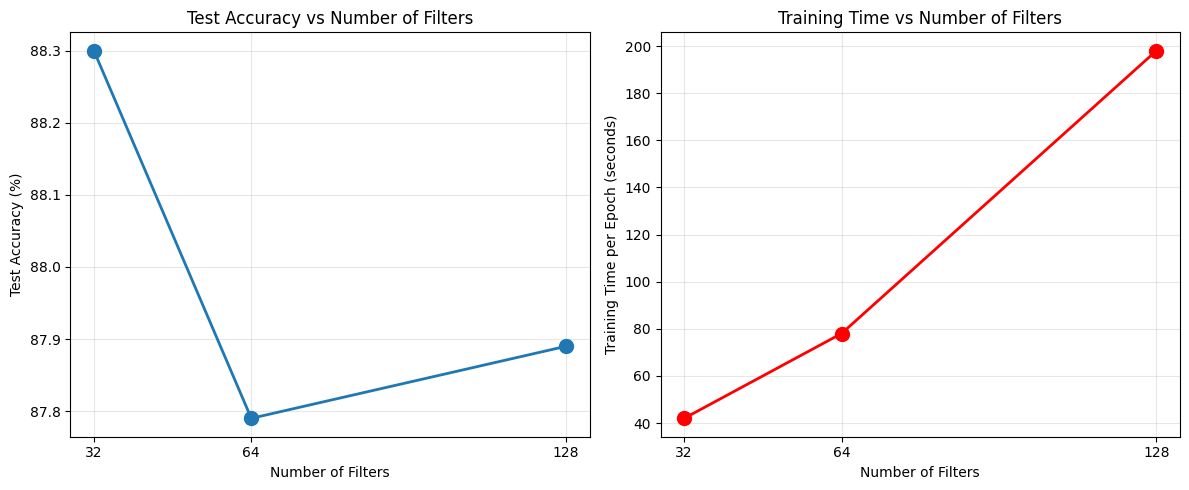

In [25]:
import matplotlib.pyplot as plt
import numpy as np

filters = [32, 64, 128]
test_accuracies = [88.30, 87.79, 87.89]
training_times = [42, 78, 198]  # Average seconds per epoch from your output

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
ax1.plot(filters, test_accuracies, 'o-', markersize=10, linewidth=2)
ax1.set_xlabel('Number of Filters')
ax1.set_ylabel('Test Accuracy (%)')
ax1.set_title('Test Accuracy vs Number of Filters')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(filters)

# Training time plot
ax2.plot(filters, training_times, 'o-', color='red', markersize=10, linewidth=2)
ax2.set_xlabel('Number of Filters')
ax2.set_ylabel('Training Time per Epoch (seconds)')
ax2.set_title('Training Time vs Number of Filters')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(filters)

plt.tight_layout()
plt.show()

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.